<a href="https://colab.research.google.com/github/muhammed-sajid/Machine-Learning/blob/main/ML_Assignment_2_EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


df = pd.read_csv('Employee.csv')
df = pd.DataFrame(df)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [ ]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [ ]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


#Data Exploration:#
Explore the data, list down the unique values in each feature and find its length.Perform the statistical analysis and renaming of the columns.


In [ ]:
unique_values = {col: (df[col].nunique(), df[col].unique()) for col in df.columns}
unique_values

{'Company': (6,
  array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
         'Congnizant', 'Infosys Pvt Lmt'], dtype=object)),
 'Age': (29,
  array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
         21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
         33., 17.,  0., 54.])),
 'Salary': (40,
  array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
         1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
         8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
         9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
         3454., 5654., 5009., 5098., 3033.])),
 'Place': (11,
  array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
         nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
        dtype=object)),
 'Country': (1, array(['India'], dtype=object)),
 'Gender': (2, array([0, 1]))}

In [ ]:
df.rename(columns={'Company':'company','Salary':'salary', 'Age':'age','Place':'place','Country':'country','Gender':'gender'},inplace=True)

#Data Cleaning:#
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)


In [ ]:
df['age'].replace(0,np.nan)

,age
0,20.0
1,30.0
2,35.0
3,40.0
4,23.0
...,...
143,33.0
144,22.0
145,44.0
146,33.0


In [ ]:
Missing_values = df.isnull().sum()
Missing_values

,0
company,8
age,18
salary,24
place,14
country,0
gender,0


In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
company,8
age,0
salary,0
place,14
country,0
gender,0


In [ ]:
numeric_cols =df[['age', 'salary']]
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

outliers = ((numeric_cols < (q1 - 1.5 * iqr)) | (numeric_cols > (q3 + 1.5 * iqr))).sum()
print("Outliers Detected:\n",outliers)

Outliers Detected:
 age       6
salary    0
dtype: int64


In [ ]:
numeric = df[['age', 'salary']]
Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = df[~((numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR)).sum()).any(axis=1)]


<Axes: xlabel='age'>

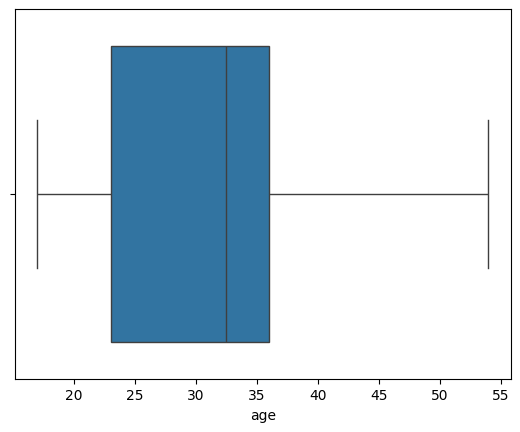

In [ ]:
sns.boxplot(x=outliers['age'])


<Axes: xlabel='salary'>

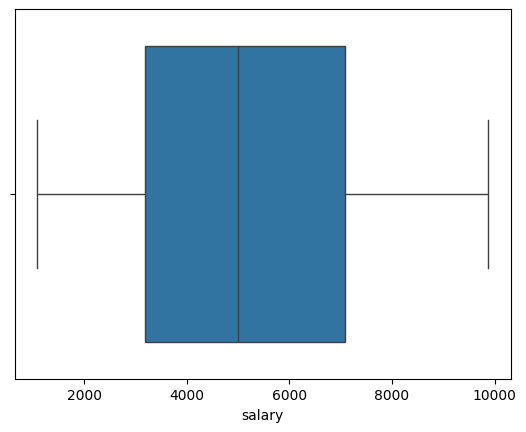

In [ ]:
sns.boxplot(x=outliers['salary'])

#Data Analysis:#
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually


In [ ]:
filter_data = df[(df['age']> 40) & (df['salary']<5000)]
filter_data

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


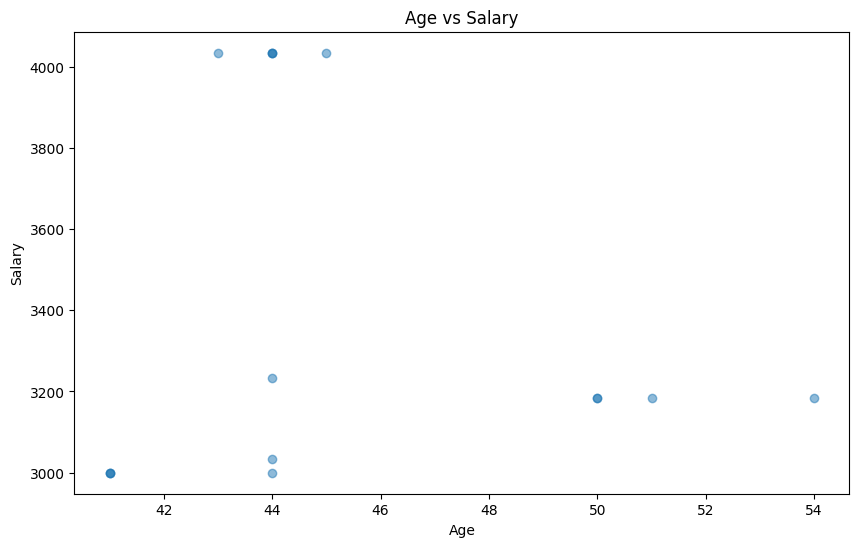

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data=filter_data, x='age', y='salary', alpha=0.5)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

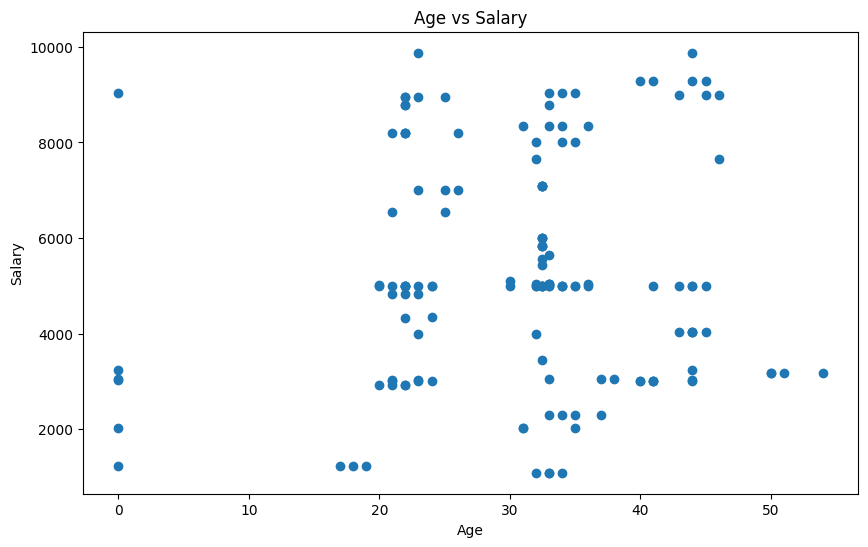

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'],df['salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

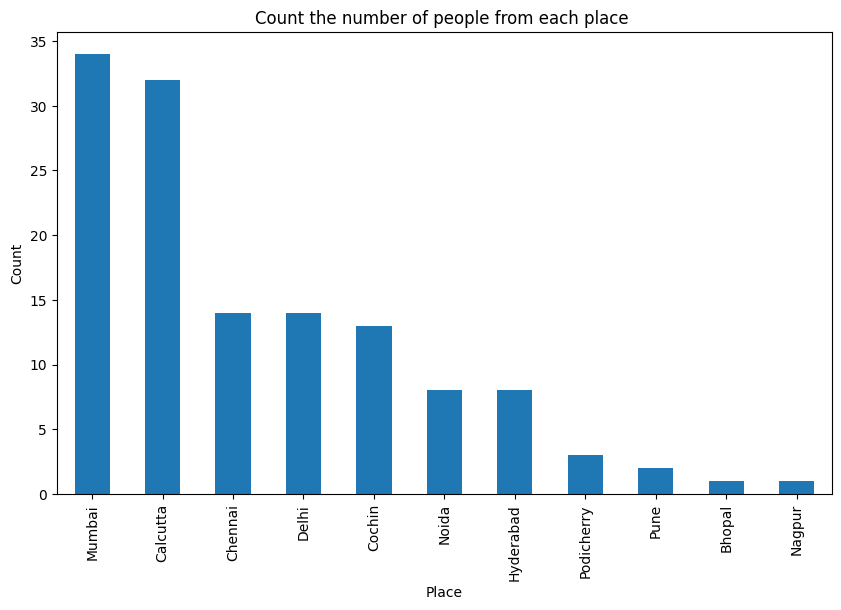

In [ ]:
place_count = df['place'].value_counts()
place_count.plot(kind='bar', figsize=(10,6))
plt.title('Count the number of people from each place ')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

#Data Encoding:#
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.


One-Hot Encoding

In [ ]:
df_mapping = {label: Index for Index, label in enumerate(df['place'].unique()) }

In [ ]:
df['place_level_encode'] = df['place'].map(df_mapping)

<ipython-input-239-fb5047cd6ff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place_level_encode'] = df['place'].map(df_mapping)


In [ ]:
df

,company,age,salary,place,country,gender,place_level_encode
0,TCS,20.0,5000.0,Chennai,India,0,0
1,Infosys,30.0,5000.0,Mumbai,India,0,1
2,TCS,35.0,2300.0,Calcutta,India,0,2
3,Infosys,40.0,3000.0,Delhi,India,0,3
4,TCS,23.0,4000.0,Mumbai,India,0,1
...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,1
143,TCS,33.0,9024.0,Calcutta,India,1,2
145,Infosys,44.0,4034.0,Delhi,India,1,3
146,TCS,33.0,5034.0,Mumbai,India,1,1


In [ ]:
for Index, label in enumerate(df['place'].unique()):
    print(Index, label)

0 Chennai
1 Mumbai
2 Calcutta
3 Delhi
4 Podicherry
5 Cochin
6 nan
7 Noida
8 Hyderabad
9 Bhopal
10 Nagpur
11 Pune


#Feature Scaling:#
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.


<Axes: ylabel='Count'>

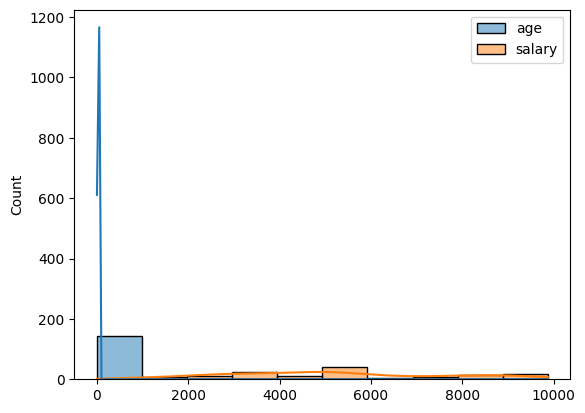

In [ ]:
s = df[['age','salary']]
sns.histplot(s,kde=True)

In [ ]:
z = MinMaxScaler()
df_min_max = z.fit_transform(s)
df_min_max

array([[0.37037037, 0.44508934],
       [0.55555556, 0.44508934],
       [0.64814815, 0.13781723],
       [0.74074074, 0.21748037],
       [0.42592593, 0.33128485],
       [0.60185185, 0.44508934],
       [0.60185185, 0.55889382],
       [0.42592593, 0.6726983 ],
       [0.62962963, 0.78650279],
       [0.83333333, 0.90030727],
       [0.42592593, 0.44508934],
       [0.62962963, 0.        ],
       [0.83333333, 0.44508934],
       [0.33333333, 0.01650165],
       [0.74074074, 0.21748037],
       [0.42592593, 0.21748037],
       [0.42592593, 0.2208945 ],
       [0.62962963, 0.44508934],
       [0.40740741, 0.44508934],
       [0.59259259, 0.44508934],
       [0.68518519, 0.22260157],
       [0.92592593, 0.23842039],
       [0.38888889, 0.42505975],
       [0.60185185, 0.54011608],
       [0.60185185, 0.68225788],
       [0.42592593, 0.89382042],
       [0.62962963, 0.82576534],
       [0.83333333, 0.93262775],
       [0.42592593, 1.        ],
       [0.64814815, 0.10754524],
       [0.

<Axes: ylabel='Count'>

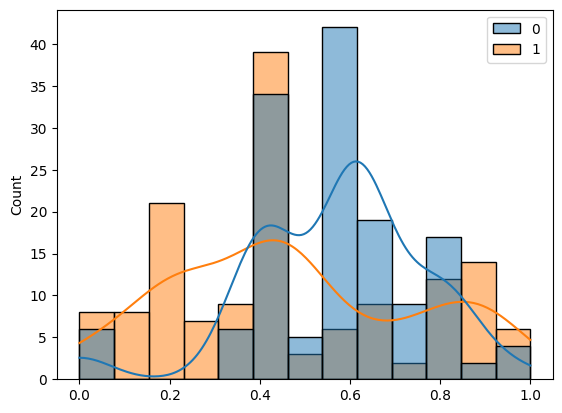

In [ ]:
sns.histplot(df_min_max, kde=True)

<Axes: ylabel='Count'>

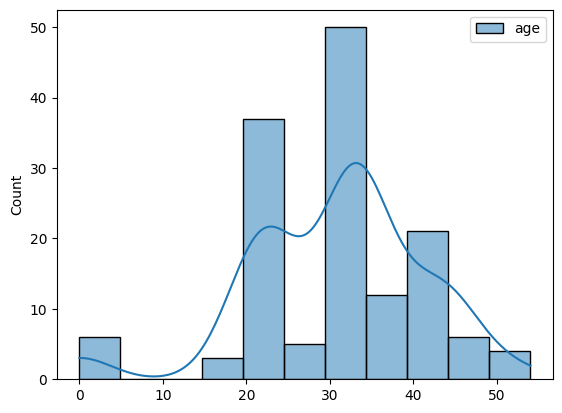

In [ ]:
x = df[['age']]
sns.histplot(x,kde=True)

In [ ]:
z = MinMaxScaler()
df_min_max_age = z.fit_transform(x)
df_min_max_age

array([[0.37037037],
       [0.55555556],
       [0.64814815],
       [0.74074074],
       [0.42592593],
       [0.60185185],
       [0.60185185],
       [0.42592593],
       [0.62962963],
       [0.83333333],
       [0.42592593],
       [0.62962963],
       [0.83333333],
       [0.33333333],
       [0.74074074],
       [0.42592593],
       [0.42592593],
       [0.62962963],
       [0.40740741],
       [0.59259259],
       [0.68518519],
       [0.92592593],
       [0.38888889],
       [0.60185185],
       [0.60185185],
       [0.42592593],
       [0.62962963],
       [0.83333333],
       [0.42592593],
       [0.64814815],
       [0.85185185],
       [0.37037037],
       [0.83333333],
       [0.66666667],
       [0.48148148],
       [0.64814815],
       [0.59259259],
       [0.64814815],
       [0.62962963],
       [0.75925926],
       [0.44444444],
       [0.60185185],
       [0.60185185],
       [0.46296296],
       [0.64814815],
       [0.85185185],
       [0.44444444],
       [0.592

<Axes: ylabel='Count'>

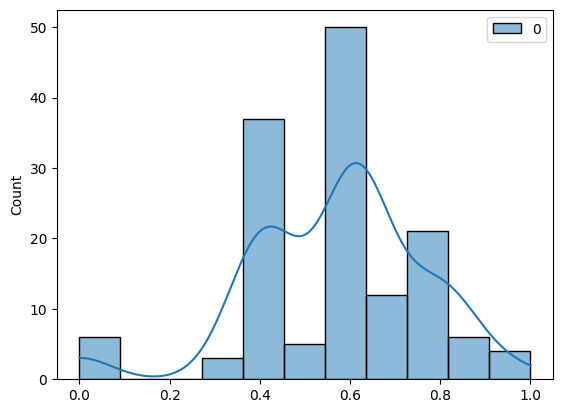

In [ ]:
sns.histplot(df_min_max_age,kde=True)

<Axes: ylabel='Count'>

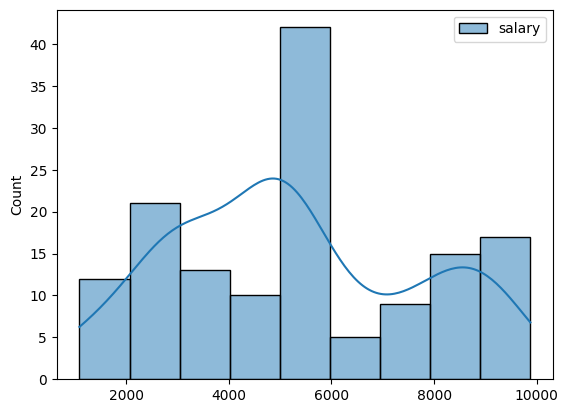

In [ ]:
y=df[['salary']]
sns.histplot(y,kde=True)

In [ ]:
z = MinMaxScaler()
df_min_max_salary = z.fit_transform(y)
df_min_max_salary

array([[0.44508934],
       [0.44508934],
       [0.13781723],
       [0.21748037],
       [0.33128485],
       [0.44508934],
       [0.55889382],
       [0.6726983 ],
       [0.78650279],
       [0.90030727],
       [0.44508934],
       [0.        ],
       [0.44508934],
       [0.01650165],
       [0.21748037],
       [0.21748037],
       [0.2208945 ],
       [0.44508934],
       [0.44508934],
       [0.44508934],
       [0.22260157],
       [0.23842039],
       [0.42505975],
       [0.54011608],
       [0.68225788],
       [0.89382042],
       [0.82576534],
       [0.93262775],
       [1.        ],
       [0.10754524],
       [0.74712644],
       [0.20996927],
       [0.33515421],
       [0.44895869],
       [0.80949129],
       [0.90303858],
       [0.44508934],
       [0.44508934],
       [0.13781723],
       [0.21748037],
       [0.3705474 ],
       [0.44508934],
       [0.55889382],
       [0.6726983 ],
       [0.78650279],
       [0.90030727],
       [0.44508934],
       [0.   

<Axes: ylabel='Count'>

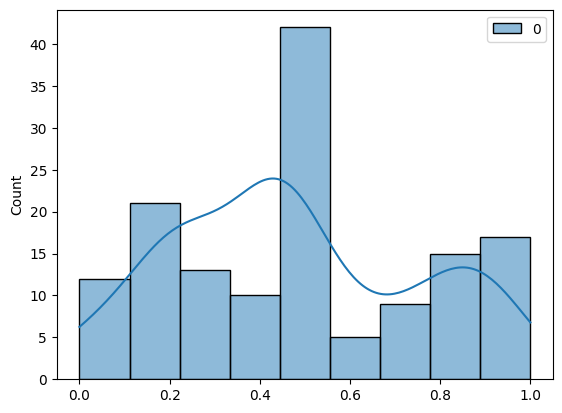

In [ ]:
sns.histplot(df_min_max_salary,kde=True)